In [1]:
from experiment import Experiment
import torch
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['A2','A3','A8','A11','A14','A15'],
    categorical_vars = ['A1','A4','A5','A6','A7','A9','A10','A12','A13'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/credit1.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=1e-2,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=30,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [4]:
exp.data.shape

(654, 16)

In [5]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10
Embedding Failed to Converge..
Learned #Bin by Variables = [4, 2, 2, 2, 4, 2]
#Init Bin = 15
Embedding Failed to Converge..
Learned #Bin by Variables = [9, 2, 5, 2, 4, 2]
#Init Bin = 20
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 2, 2, 2, 7, 3]
CPU times: user 3min 32s, sys: 46.8 s, total: 4min 19s
Wall time: 1min 12s


In [6]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 48, NMI = 0.0257
agglomerative, #Cols = 48, NMI = 0.0304


In [7]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 48, NMI = 0.1483
agglomerative, #Cols = 48, NMI = 0.1020


In [8]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 54, #NMI = 0.0226
#Bins = 3, #Cols = 60, #NMI = 0.0226
#Bins = 4, #Cols = 66, #NMI = 0.0226
#Bins = 5, #Cols = 72, #NMI = 0.0226
#Bins = 6, #Cols = 78, #NMI = 0.0226
#Bins = 7, #Cols = 84, #NMI = 0.0226
#Bins = 8, #Cols = 90, #NMI = 0.0226
#Bins = 9, #Cols = 96, #NMI = 0.0226
#Bins = 10, #Cols = 102, #NMI = 0.0226
#Bins = 11, #Cols = 108, #NMI = 0.0226
#Bins = 12, #Cols = 114, #NMI = 0.0226
#Bins = 13, #Cols = 120, #NMI = 0.0226
#Bins = 14, #Cols = 126, #NMI = 0.0226
#Bins = 15, #Cols = 132, #NMI = 0.0226
#Bins = 16, #Cols = 138, #NMI = 0.0226
#Bins = 17, #Cols = 144, #NMI = 0.0226
#Bins = 18, #Cols = 150, #NMI = 0.2947
#Bins = 19, #Cols = 156, #NMI = 0.3004
#Bins = 20, #Cols = 162, #NMI = 0.0226
agglomerative
#Bins = 2, #Cols = 54, #NMI = 0.0258
#Bins = 3, #Cols = 60, #NMI = 0.0252
#Bins = 4, #Cols = 66, #NMI = 0.0266
#Bins = 5, #Cols = 72, #NMI = 0.0252
#Bins = 6, #Cols = 78, #NMI = 0.0122
#Bins = 7, #Cols = 84, #NMI = 0.0239
#Bins = 8, #Cols = 90, #NMI = 0.

In [9]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 53, #NMI = 0.3508
#Bins = 3, #Cols = 58, #NMI = 0.2434
#Bins = 4, #Cols = 63, #NMI = 0.3048
#Bins = 5, #Cols = 68, #NMI = 0.2445
#Bins = 6, #Cols = 72, #NMI = 0.2042
#Bins = 7, #Cols = 78, #NMI = 0.1739
#Bins = 8, #Cols = 82, #NMI = 0.1740
#Bins = 9, #Cols = 87, #NMI = 0.1693
#Bins = 10, #Cols = 92, #NMI = 0.1763
#Bins = 11, #Cols = 96, #NMI = 0.1670
#Bins = 12, #Cols = 100, #NMI = 0.1716
#Bins = 13, #Cols = 105, #NMI = 0.1670
#Bins = 14, #Cols = 110, #NMI = 0.1716
#Bins = 15, #Cols = 115, #NMI = 0.1693
#Bins = 16, #Cols = 119, #NMI = 0.1670
#Bins = 17, #Cols = 123, #NMI = 0.1670
#Bins = 18, #Cols = 129, #NMI = 0.1670
#Bins = 19, #Cols = 134, #NMI = 0.1602
#Bins = 20, #Cols = 138, #NMI = 0.1716
agglomerative
#Bins = 2, #Cols = 53, #NMI = 0.0249
#Bins = 3, #Cols = 58, #NMI = 0.2146
#Bins = 4, #Cols = 63, #NMI = 0.0249
#Bins = 5, #Cols = 68, #NMI = 0.1445
#Bins = 6, #Cols = 72, #NMI = 0.2391
#Bins = 7, #Cols = 78, #NMI = 0.0252
#Bins = 8, #Cols = 82, #NMI = 0.18

In [10]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 58, NMI = 0.2370
#Init Bins = 15, #Cols = 66, NMI = 0.2450
#Init Bins = 20, #Cols = 60, NMI = 0.3619
agglomerative
#Init Bins = 10, #Cols = 58, NMI = 0.1686
#Init Bins = 15, #Cols = 66, NMI = 0.2076
#Init Bins = 20, #Cols = 60, NMI = 0.2141


In [11]:
%time clf_scores = exp.test_classification_performance(cv=3)

ValueError: Number of features of the model must match the input. Model n_features is 48 and input n_features is 46 

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [4]:
exp.data.shape

(654, 16)

In [11]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=100, lr=1e-3, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=7)

>>> Epoch = 1, Loss = 0.6883636713027954
[6, 6, 5, 2, 2, 2] 0.248029143528
>>> Epoch = 2, Loss = 0.6440315842628479
[2, 6, 2, 2, 2, 3] 0.230052506687
>>> Epoch = 3, Loss = 0.5749793648719788
[2, 6, 2, 2, 2, 3] 0.243602039631
>>> Epoch = 4, Loss = 0.49788498878479004
[2, 6, 2, 2, 2, 2] 0.227470457818
>>> Epoch = 5, Loss = 0.4607963263988495
[5, 6, 2, 2, 2, 4] 0.274039322214
>>> Epoch = 6, Loss = 0.4069913923740387
[5, 5, 2, 2, 2, 4] 0.34516951453
>>> Epoch = 7, Loss = 0.4152425527572632
[5, 5, 2, 2, 2, 4] 0.294129218274
>>> Epoch = 8, Loss = 0.38856270909309387
[5, 5, 2, 2, 2, 4] 0.286591692561
>>> Epoch = 9, Loss = 0.3734966218471527
[5, 5, 2, 2, 2, 4] 0.28540864067
>>> Epoch = 10, Loss = 0.3787913918495178
[5, 5, 2, 2, 2, 4] 0.290167655995
>>> Epoch = 11, Loss = 0.37357011437416077
[5, 5, 2, 2, 2, 4] 0.297971496733
>>> Epoch = 12, Loss = 0.36925986409187317
[5, 5, 2, 2, 2, 4] 0.306569261498
>>> Epoch = 13, Loss = 0.372437059879303
[5, 5, 2, 2, 2, 4] 0.313246994988
>>> Epoch = 14, Loss

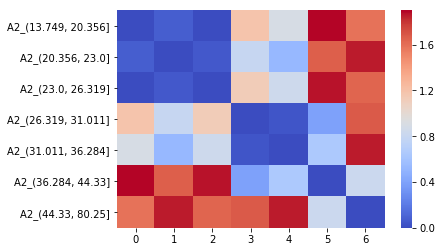

In [12]:
sb.plot_pairwise_distance_between_bins('A2')

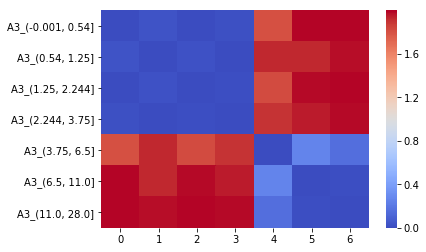

In [13]:
sb.plot_pairwise_distance_between_bins('A3')

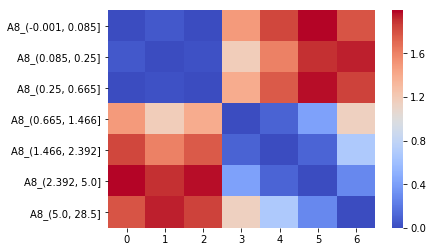

In [14]:
sb.plot_pairwise_distance_between_bins('A8')

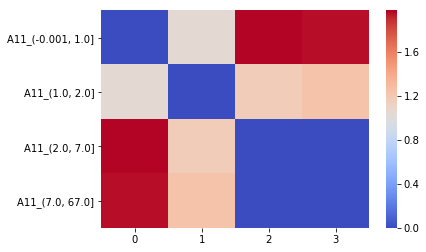

In [15]:
sb.plot_pairwise_distance_between_bins('A11')

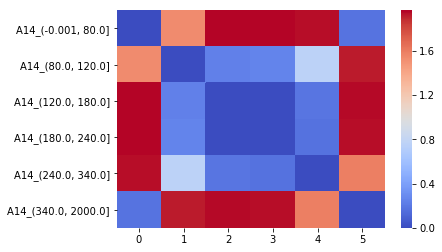

In [16]:
sb.plot_pairwise_distance_between_bins('A14')

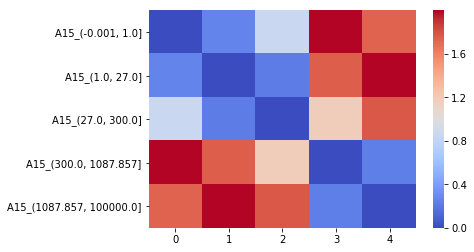

In [17]:
sb.plot_pairwise_distance_between_bins('A15')

In [18]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

A2
['(13.749, 26.319]', '(26.319, 36.284]', '(36.284, 44.33]', '(44.33, 80.25]']
A3
['(-0.001, 3.75]', '(3.75, 28.0]']
A8
['(-0.001, 0.665]', '(0.665, 28.5]']
A11
['(-0.001, 2.0]', '(2.0, 67.0]']
A14
['(-0.001, 80.0]', '(80.0, 340.0]', '(340.0, 2000.0]']
A15
['(-0.001, 300.0]', '(300.0, 100000.0]']


### inter bin distance penalty가 모든 step에서 매번 계산. 특히 #init bin이 많아질수록 더 많은 penalty가 부여되서 최적화를 어렵게 만드는듯함. 

In [12]:
from sklearn.cluster import KMeans

In [ ]:
KMeans